In [225]:
import numpy as np
import pandas as pd

In [226]:
master_loan = pd.read_csv(r"D:\PG-DAI\MachineLearning\Dec 21 Random Forest\train_loan.csv")

In [227]:
master_loan.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [228]:
# master_loan['Loan'], master_loan['Loan2'] = pd.get_dummies(master_loan.Loan_Status)

In [229]:
# x = master_loan.join(pd.get_dummies(master_loan.Loan_Status))
master_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [230]:
categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed','Property_Area','Loan_Status'] 


#import pandas as pd
df = pd.get_dummies(master_loan, columns = categorical_cols)

In [231]:
master_eda =df

In [232]:
del master_eda['Loan_ID']
del master_eda['Gender_Female']
del master_eda['Married_No']
del master_eda['Education_Not Graduate']
del master_eda['Self_Employed_No']
del master_eda['Property_Area_Semiurban']
del master_eda['Loan_Status_N']


In [233]:
master_eda['Dependents']=master_eda['Dependents'].replace('\+','',regex=True).astype(float)


In [234]:
master_eda

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Graduate,Self_Employed_Yes,Property_Area_Rural,Property_Area_Urban,Loan_Status_Y
0,0.0,5849,0.0,NaN,360.0,1.0,1,0,1,0,0,1,1
1,1.0,4583,1508.0,128.0,360.0,1.0,1,1,1,0,1,0,0
2,0.0,3000,0.0,66.0,360.0,1.0,1,1,1,1,0,1,1
3,0.0,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,1
4,0.0,6000,0.0,141.0,360.0,1.0,1,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,2900,0.0,71.0,360.0,1.0,0,0,1,0,1,0,1
610,3.0,4106,0.0,40.0,180.0,1.0,1,1,1,0,1,0,1
611,1.0,8072,240.0,253.0,360.0,1.0,1,1,1,0,0,1,1
612,2.0,7583,0.0,187.0,360.0,1.0,1,1,1,0,0,1,1


In [235]:
master_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Dependents           599 non-null    float64
 1   ApplicantIncome      614 non-null    int64  
 2   CoapplicantIncome    614 non-null    float64
 3   LoanAmount           592 non-null    float64
 4   Loan_Amount_Term     600 non-null    float64
 5   Credit_History       564 non-null    float64
 6   Gender_Male          614 non-null    uint8  
 7   Married_Yes          614 non-null    uint8  
 8   Education_Graduate   614 non-null    uint8  
 9   Self_Employed_Yes    614 non-null    uint8  
 10  Property_Area_Rural  614 non-null    uint8  
 11  Property_Area_Urban  614 non-null    uint8  
 12  Loan_Status_Y        614 non-null    uint8  
dtypes: float64(5), int64(1), uint8(7)
memory usage: 33.1 KB


In [236]:
master_eda = master_eda[master_eda['Credit_History'].notna()]


In [237]:
master_eda['LoanAmount'].replace(to_replace=np.nan, value=master_eda.LoanAmount.mean(), inplace=True, limit=None, regex=False, method='pad')


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [238]:
df = master_eda[master_eda['Dependents'].notna()]
df = df[df['Loan_Amount_Term'].notna()]

master_eda = df

In [239]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(master_eda.loc[:,master_eda.columns != 'Loan_Status_Y'], master_eda['Loan_Status_Y'], stratify=master_eda['Loan_Status_Y'])

In [240]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.loc[:,df.columns != 'Loan_Status_Y'], df['Loan_Status_Y'], stratify=df['Loan_Status_Y'])

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536 entries, 0 to 613
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Dependents           536 non-null    float64
 1   ApplicantIncome      536 non-null    int64  
 2   CoapplicantIncome    536 non-null    float64
 3   LoanAmount           536 non-null    float64
 4   Loan_Amount_Term     536 non-null    float64
 5   Credit_History       536 non-null    float64
 6   Gender_Male          536 non-null    uint8  
 7   Married_Yes          536 non-null    uint8  
 8   Education_Graduate   536 non-null    uint8  
 9   Self_Employed_Yes    536 non-null    uint8  
 10  Property_Area_Rural  536 non-null    uint8  
 11  Property_Area_Urban  536 non-null    uint8  
 12  Loan_Status_Y        536 non-null    uint8  
dtypes: float64(5), int64(1), uint8(7)
memory usage: 33.0 KB


## Decision Tree Classifier

In [242]:

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(X_train, y_train)

y_pred = clf.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7014925373134329


## Random Forest Classifier

In [250]:
from sklearn.ensemble import RandomForestClassifier  
a=[]
for i in range(10,300,10):
    classifier= RandomForestClassifier(n_estimators= i, criterion="entropy")  
    classifier.fit(X_train, y_train)  
    y_pred= classifier.predict(X_test)  
#     print(i, metrics.accuracy_score(y_test,y_pred))
    a.append(metrics.accuracy_score(y_test,y_pred))
np.mean(a)


0.8041688111168296

In [263]:
df

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Graduate,Self_Employed_Yes,Property_Area_Rural,Property_Area_Urban,Loan_Status_Y
0,0.0,5849,0.0,145.088398,360.0,1.0,1,0,1,0,0,1,1
1,1.0,4583,1508.0,128.000000,360.0,1.0,1,1,1,0,1,0,0
2,0.0,3000,0.0,66.000000,360.0,1.0,1,1,1,1,0,1,1
3,0.0,2583,2358.0,120.000000,360.0,1.0,1,1,0,0,0,1,1
4,0.0,6000,0.0,141.000000,360.0,1.0,1,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,2900,0.0,71.000000,360.0,1.0,0,0,1,0,1,0,1
610,3.0,4106,0.0,40.000000,180.0,1.0,1,1,1,0,1,0,1
611,1.0,8072,240.0,253.000000,360.0,1.0,1,1,1,0,0,1,1
612,2.0,7583,0.0,187.000000,360.0,1.0,1,1,1,0,0,1,1


In [252]:
from sklearn.model_selection import GridSearchCV

gd1= GridSearchCV(classifier,{'max_depth':[3,4,5,10,20,50,80,100],'criterion':['gini','entropy']},cv=10)
gd1.fit(X_train,y_train)
print(gd1.best_params_)
print(gd1.best_score_)

{'criterion': 'entropy', 'max_depth': 4}
0.8035365853658536


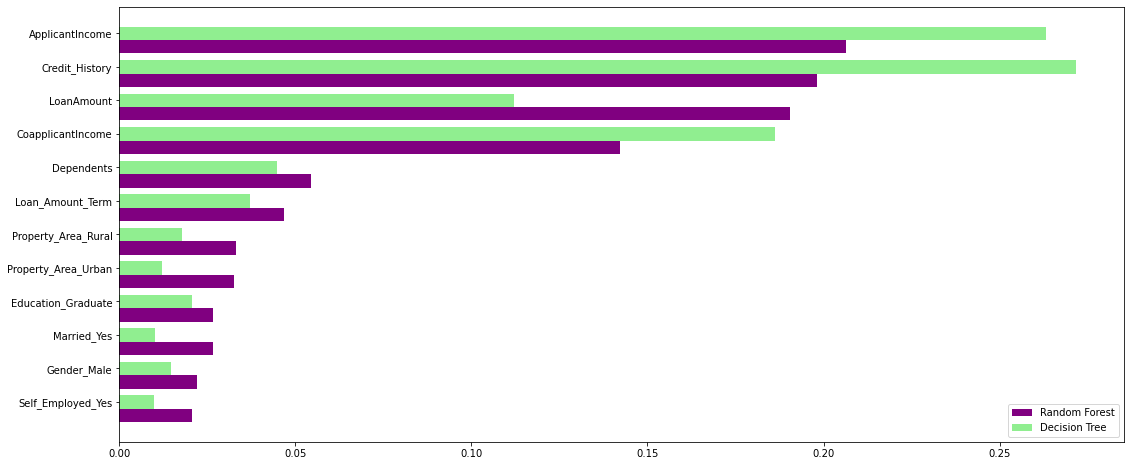

In [269]:
import matplotlib.pyplot as plt
feature_importance=pd.DataFrame({'rfc':classifier.feature_importances_,'dt':clf.feature_importances_},index=df.drop(columns=['Loan_Status_Y']).columns)
feature_importance.sort_values(by='rfc',ascending=True,inplace=True)
 
index = np.arange(len(feature_importance))
fig, ax = plt.subplots(figsize=(18,8))
rfc_feature=ax.barh(index,feature_importance['rfc'],0.4,color='purple',label='Random Forest')
dt_feature=ax.barh(index+0.4,feature_importance['dt'],0.4,color='lightgreen',label='Decision Tree')
ax.set(yticks=index+0.4,yticklabels=feature_importance.index)
 
ax.legend()
plt.show()

NameError: name 'rfc' is not defined